In [12]:
import re
import unicodedata
import pandas as pd
import nltk
import ma
from env import user, password, host


def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()


ModuleNotFoundError: No module named 'ma'

# Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [3]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
ham,4825,0.865937
spam,747,0.134063


In [4]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))


In [ ]:
#this was on the curriculm about ham wordsz

In [10]:
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2)).value_counts().head(20))
ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(wat, time)        18
(last, night)      18
(hi, hi)           18
(great, day)       17
(dont, want)       15
(want, go)         15
dtype: int64

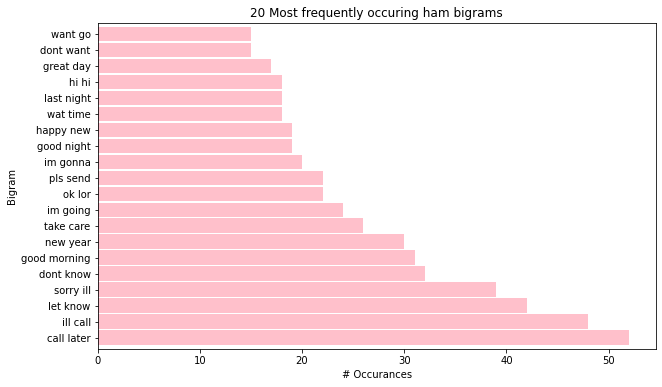

In [13]:
import matplotlib.pyplot as plt
ham_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

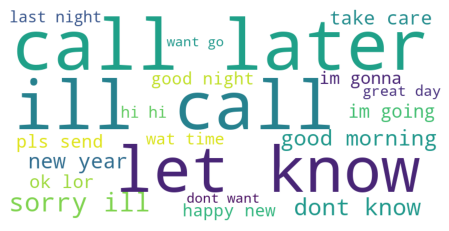

In [20]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
# spam words 

In [14]:
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2)).value_counts().head(20))
spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(send, stop)            19
(selected, receive)     19
(await, collection)     19
(every, week)           19
(chance, win)           19
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           17
(sae, tc)               16
(account, statement)    16
(call, 08000930705)     16
(prize, claim)          16
(ur, mob)               15
dtype: int64

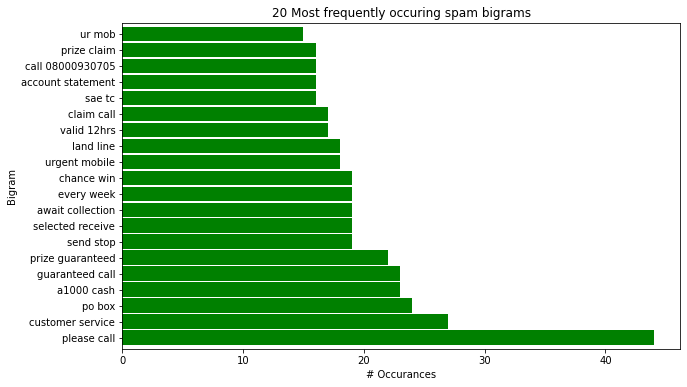

In [15]:
spam_bigrams.sort_values(ascending=False).plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [16]:
#ur mob ?? what the heck is that??
#the word please call is a large ammount 

In [18]:
from wordcloud import WordCloud


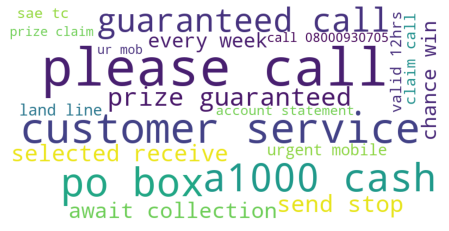

In [19]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


### How they are diffrent

- Please call is huge for spam and custoemr servive
- for ham there is like call later or ill call or let you know
- 
- 
- 

# Is there any overlap in the bigrams for the spam data and the ham data?

- the word call is huge in both or something to do with call 

# Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [ ]:
#for ham

In [23]:
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20))
ham_trigrams

(ill, call, later)          42
(sorry, ill, call)          38
(happy, new, year)          19
(pls, send, message)        13
(cant, pick, phone)         12
(right, pls, send)          12
(phone, right, pls)         12
(pick, phone, right)        12
(hi, hi, hi)                11
(x, x, x)                    8
(good, morning, dear)        7
(call, later, meeting)       6
(convey, birthday, wish)     6
(pls, convey, birthday)      6
(kiss, across, sea)          6
(lunch, lunch, invited)      5
(man, last, week)            5
(story, man, last)           5
(sad, story, man)            5
(love, go, day)              5
dtype: int64

Text(0.5, 0, '# Occurances')

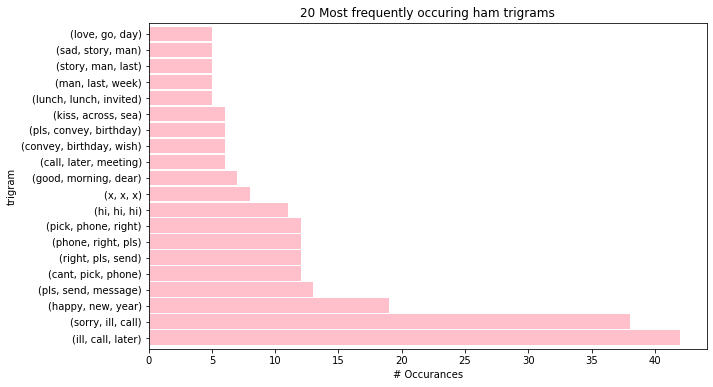

In [33]:
ham_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')

# # make the labels pretty
# ticks, _ = plt.yticks()
# labels = ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)

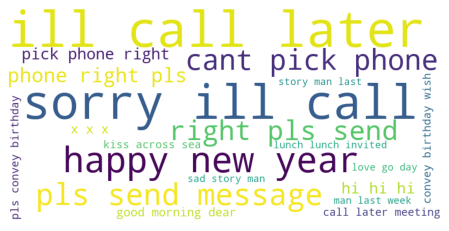

In [37]:
data = {k[0] + ' ' + k[1] + ' '+ k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


In [36]:
#for spam

In [28]:
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20))
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             14
(private, 2003, account)               13
(2003, account, statement)             13
(camcorder, reply, call)               12
(guaranteed, a1000, cash)              12
(show, 800, unredeemed)                12
(urgent, trying, contact)              11
(tone, 4, ur)                          11
(anytime, network, min)                11
(please, call, customer)               11
(every, week, txt)                     11
(bonus, caller, prize)                 11
(speak, live, operator)                10
(customer, service, representative)    10
(a2000, bonus, caller)                 10
(cash, await, collection)              10
(mob, every, week)                      9
dtype: int64

Text(0.5, 0, '# Occurances')

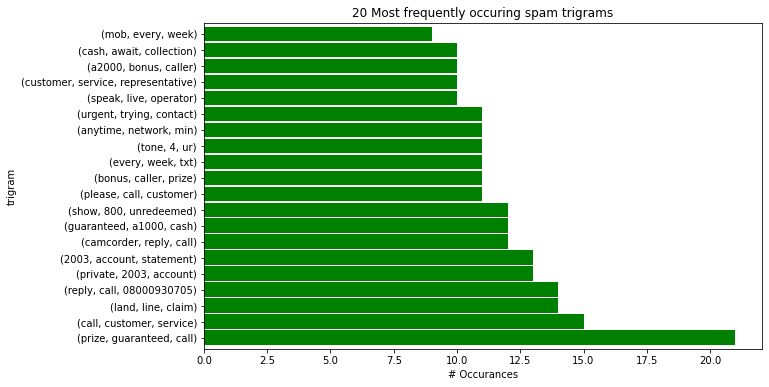

In [32]:
spam_trigrams.sort_values(ascending=False).plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')

# make the labels pretty
# ticks, _ = plt.yticks()
# labels = spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)

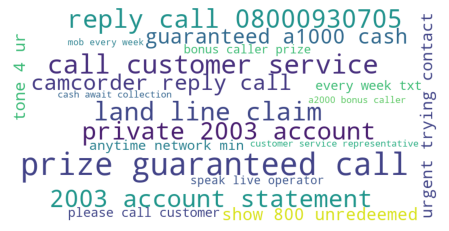

In [38]:
data = {k[0] + ' ' + k[1] + ' '+ k[2]: v for k, v in spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

# 3. Explore the blog articles using the techniques discussed in the exploration lesson.

In [41]:

blog = pd.read_json('blog_posts.json')



In [42]:
blog

,title,date_published,content
0,Mental Health First Aid Training,"May 31, 2022","\nAs a student of Codeup, going through a mass..."
1,Inclusion at Codeup During Pride Month (and Al...,"Jun 1, 2022",\nHappy Pride Month! Pride Month is a dedicate...
2,Codeup Dallas Joins Career Day,"May 16, 2022",\nLast week our Codeup Dallas team participate...
3,From Bootcamp to Bootcamp | A Military Appreci...,"Apr 27, 2022",\n\n\n\n\n\nIn honor of Military Appreciation ...
4,5 Reasons To Attend Our New Cloud Administrati...,"May 17, 2022",\nCome Work In The Cloud\nWhen your Monday rol...


In [44]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [48]:
labels = pd.concat([blog.title.value_counts(),
                    blog.title.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
Mental Health First Aid Training,1,0.2
Inclusion at Codeup During Pride Month (and Always),1,0.2
Codeup Dallas Joins Career Day,1,0.2
From Bootcamp to Bootcamp | A Military Appreciation Panel,1,0.2
5 Reasons To Attend Our New Cloud Administration Program,1,0.2
